### Project2 by Garima Mandal, Intro to DL

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from keras import models
from keras import layers
from keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD
from keras.layers import Activation, Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

### Data pre-processing

In [14]:
dataset_wheather = pd.read_csv(r'C:\Users\HP\Downloads\Jan_W2020.csv')
dataset_wheather

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,2020-01-02,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
2,2020-01-03,7.6,6.7,8.3,NaN,NaN,NaN,8.4,NaN,1010.2,NaN
3,2020-01-04,8.2,6.7,9.4,NaN,NaN,NaN,5.7,NaN,1003.7,NaN
4,2020-01-05,4.6,2.8,7.2,NaN,NaN,NaN,8.2,NaN,1010.1,NaN
5,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-07,4.7,3.3,6.7,NaN,NaN,NaN,10.4,NaN,1016.2,NaN
7,2020-01-08,2.6,-0.6,6.7,NaN,NaN,NaN,13.4,NaN,1016.6,NaN
8,2020-01-09,-0.6,-3.3,2.2,NaN,NaN,NaN,9.1,NaN,1038.8,NaN
9,2020-01-10,6.4,1.1,11.7,NaN,NaN,265.0,14.5,NaN,1034.5,NaN


In [15]:
dataw=dataset_wheather.drop(['tmin','tmax','prcp','snow','wdir','wspd','wpgt','pres','tsun'], axis=1)
dataw

,date,tavg
0,2020-01-01,3.6
1,2020-01-02,4.7
2,2020-01-03,7.6
3,2020-01-04,8.2
4,2020-01-05,4.6
5,2020-01-06,NaN
6,2020-01-07,4.7
7,2020-01-08,2.6
8,2020-01-09,-0.6
9,2020-01-10,6.4


In [16]:
dataw['tavg']=dataw['tavg'].fillna(dataw['tavg'].mean())
dataw

,date,tavg
0,2020-01-01,3.600
1,2020-01-02,4.700
2,2020-01-03,7.600
3,2020-01-04,8.200
4,2020-01-05,4.600
5,2020-01-06,4.225
6,2020-01-07,4.700
7,2020-01-08,2.600
8,2020-01-09,-0.600
9,2020-01-10,6.400


In [17]:
dataw["date"] = pd.to_datetime(dataw["date"]).dt.date

In [18]:
dataset_jan = pd.read_parquet(r'C:\Users\HP\OneDrive\Desktop\Intro to DL\yellow_tripdata_2020_01.parquet', engine = 'fastparquet')
dataset_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,<NA>
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,<NA>
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,<NA>
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,<NA>
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,None,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,NaN,<NA>
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,None,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,NaN,<NA>
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,None,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,NaN,<NA>
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,None,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,NaN,<NA>


In [19]:
dataset_jan['trip_duration']=(dataset_jan['tpep_dropoff_datetime']-dataset_jan['tpep_pickup_datetime']).dt.seconds/60

In [20]:
dataj=dataset_jan.drop(['airport_fee','VendorID','tpep_dropoff_datetime','store_and_fwd_flag'], axis=1)

In [21]:
dataj['RatecodeID']=dataj['RatecodeID'].fillna(dataj['RatecodeID'].mean())

In [22]:
dataj['congestion_surcharge']=dataj['congestion_surcharge'].fillna(dataj['congestion_surcharge'].mean())

In [23]:
dataj['passenger_count']=dataj['passenger_count'].fillna(dataj['passenger_count'].mean())

In [24]:
dataj["tpep_pickup_datetime"] = pd.to_datetime(dataj["tpep_pickup_datetime"]).dt.date

In [25]:
dataj=dataj.rename(columns={'tpep_pickup_datetime': 'date'})

In [26]:
dataj

,date,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,2020-01-01,1.000000,1.20,1.000000,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.500000,4.800000
1,2020-01-01,1.000000,1.20,1.000000,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.500000,7.416667
2,2020-01-01,1.000000,0.60,1.000000,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.500000,6.183333
3,2020-01-01,1.000000,0.80,1.000000,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.000000,4.850000
4,2020-01-01,1.000000,0.00,1.000000,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.000000,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2020-01-31,1.515333,12.07,1.059908,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,2.299052,26.000000
6405004,2020-01-31,1.515333,23.48,1.059908,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,2.299052,44.000000
6405005,2020-01-31,1.515333,12.09,1.059908,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,2.299052,25.000000
6405006,2020-01-31,1.515333,11.65,1.059908,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,2.299052,24.266667


In [27]:
finaldata = pd.merge(dataw, dataj,on='date')
finaldata

,date,tavg,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,2020-01-01,3.6,1.000000,1.20,1.000000,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.500000,4.800000
1,2020-01-01,3.6,1.000000,1.20,1.000000,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.500000,7.416667
2,2020-01-01,3.6,1.000000,0.60,1.000000,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.500000,6.183333
3,2020-01-01,3.6,1.000000,0.80,1.000000,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.000000,4.850000
4,2020-01-01,3.6,1.000000,0.00,1.000000,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.000000,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404791,2020-01-31,4.3,1.515333,12.07,1.059908,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,2.299052,26.000000
6404792,2020-01-31,4.3,1.515333,23.48,1.059908,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,2.299052,44.000000
6404793,2020-01-31,4.3,1.515333,12.09,1.059908,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,2.299052,25.000000
6404794,2020-01-31,4.3,1.515333,11.65,1.059908,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,2.299052,24.266667


In [28]:
finaldata.isnull().sum()

date                     0
tavg                     0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
trip_duration            0
dtype: int64

In [29]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6404796 entries, 0 to 6404795
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   object 
 1   tavg                   float64
 2   passenger_count        float64
 3   trip_distance          float64
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
 16  trip_duration          float64
dtypes: float64(13), int64(3), object(1)
memory usage: 879.6+ MB


In [30]:
finaldata=finaldata.drop(['date'], axis=1)

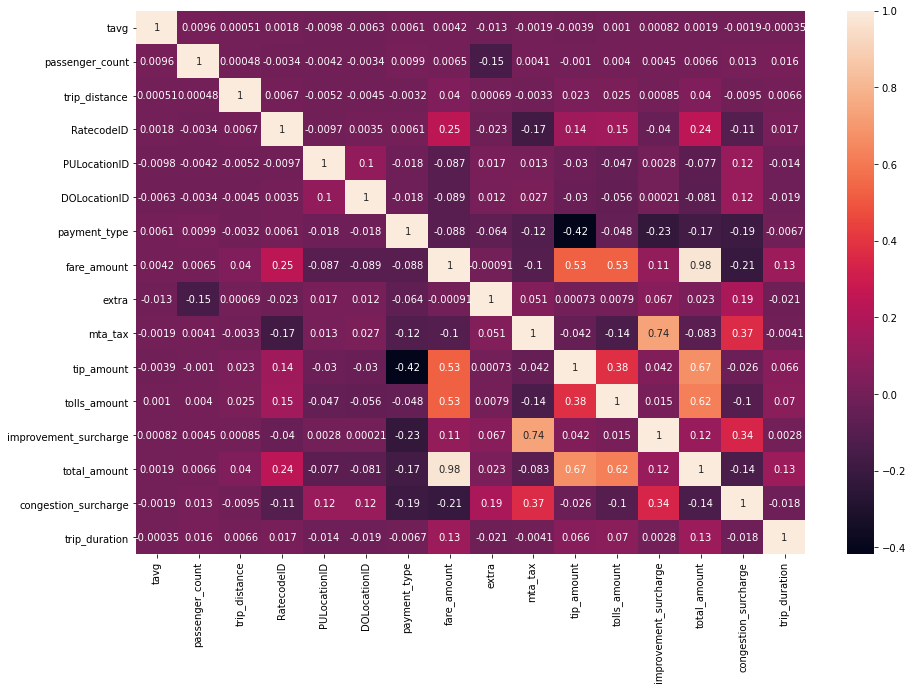

In [31]:
data = pd.DataFrame(finaldata,columns=['tavg','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','trip_duration'])
pyplot.figure(figsize=(15,10))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
pyplot.show()

### Linear regression 

In [32]:
X = finaldata.drop("trip_duration", axis=1)
Y = finaldata["trip_duration"]

In [33]:
X = np.array(X)
Y = np.array(Y)

In [34]:
scaler = StandardScaler(copy=False)
scaler.fit(X)
scaler.transform(X)

array([[-1.63723798e-01, -4.49795510e-01, -2.07987186e-02, ...,
         5.94496609e-02, -5.00992066e-01,  2.87838012e-01],
       [-1.63723798e-01, -4.49795510e-01, -2.07987186e-02, ...,
         5.94496609e-02, -4.31194271e-01,  2.87838012e-01],
       [-1.63723798e-01, -4.49795510e-01, -2.80136849e-02, ...,
         5.94496609e-02, -5.32841546e-01,  2.87838012e-01],
       ...,
       [ 3.68908233e-02,  1.23673939e-05,  1.10152919e-01, ...,
         5.94496609e-02,  1.96700377e+00, -1.06009294e-05],
       [ 3.68908233e-02,  1.23673939e-05,  1.04861944e-01, ...,
         5.94496609e-02,  8.89542654e-01, -1.06009294e-05],
       [ 3.68908233e-02,  1.23673939e-05,  6.74643688e-02, ...,
         5.94496609e-02,  1.06369832e+00, -1.06009294e-05]])

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 18)

In [36]:
X.shape[1]

15

In [37]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=15, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [38]:
# fit model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2, verbose=True, batch_size=256)

Epoch 1/2
20015/20015 [==============================] - 47s 2ms/step - loss: 4055.1060 - accuracy: 1.6316e-04 - val_loss: 3917.5605 - val_accuracy: 1.6940e-04
Epoch 2/2
20015/20015 [==============================] - 46s 2ms/step - loss: 4059.9519 - accuracy: 2.0297e-04 - val_loss: 3914.5381 - val_accuracy: 1.8580e-04


In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,4055.105957,0.000163,3917.560547,0.000169,0
1,4059.951904,0.000203,3914.538086,0.000186,1


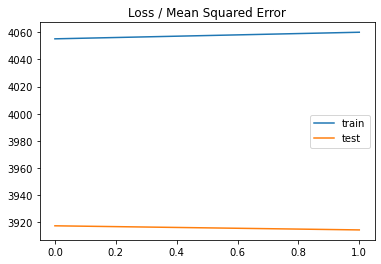

In [40]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [41]:
tensorboard_callback = TensorBoard(
    log_dir='Users\HP\OneDrive\Desktop\Intro to DL',
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
)

model = keras.Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_shape=(20,)))
model.add(Dense(1, activation='softmax', name = 'Layer8'))


opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="mse", metrics=['mse','mae','accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2, verbose=True, batch_size=256)

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1344      
                                                                 
 Layer8 (Dense)              (None, 1)                 65        
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_2_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'units': 64,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'Layer8',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     '

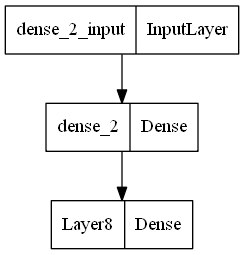

In [44]:
plot_model(model, to_file='model.png')

### MLP Regressor

In [56]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(150,100,50),
    max_iter = 7,
    activation = 'relu',
    solver = 'adam',
    random_state = 5,
    verbose = True
)
mlp_reg.fit(
    X_train,
    Y_train
)

NameError: name 'MLPRegressor' is not defined

In [57]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mse', 'mae', 'mape', 'accuracy']
)

history = model.fit(
    X_train,
    Y_train,
    batch_size = 256,
    epochs=10,
    validation_data=(X_test, Y_test),
    shuffle=True, 
    verbose=True,

)

Epoch 1/10
20015/20015 [==============================] - 74s 4ms/step - loss: 3.9933 - mse: 3844.0879 - mae: 3.9933 - mape: 6997776.0000 - accuracy: 1.4169e-04 - val_loss: 4.0121 - val_mse: 3923.7700 - val_mae: 4.0121 - val_mape: 6352479.5000 - val_accuracy: 1.4364e-04
Epoch 2/10
20015/20015 [==============================] - 60s 3ms/step - loss: 3.9926 - mse: 3842.2468 - mae: 3.9926 - mape: 6992380.5000 - accuracy: 1.4169e-04 - val_loss: 4.0980 - val_mse: 3917.1709 - val_mae: 4.0980 - val_mape: 6817646.0000 - val_accuracy: 1.4364e-04
Epoch 3/10
20015/20015 [==============================] - 63s 3ms/step - loss: 3.9935 - mse: 3844.2371 - mae: 3.9935 - mape: 7027585.0000 - accuracy: 1.4169e-04 - val_loss: 4.1819 - val_mse: 3931.8987 - val_mae: 4.1819 - val_mape: 6160931.0000 - val_accuracy: 1.4364e-04
Epoch 4/10
20015/20015 [==============================] - 58s 3ms/step - loss: 3.9942 - mse: 3844.1091 - mae: 3.9942 - mape: 7094444.5000 - accuracy: 1.4169e-04 - val_loss: 4.0177 - val_m

In [58]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 15)]              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               1600      
                                                                 
 HiddenLayer2 (Dense)        (None, 50)                5050      
                                                                 
 output (Dense)              (None, 1)                 51        
                                                                 
Total params: 6,701
Trainable params: 6,701
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 15),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'InputLayer'},
   'name': 'InputLayer',
   'inbound_nodes': []},
  {'class_name': 'Dense',
   'config': {'name': 'HiddenLayer1',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'HiddenLayer1',
   'inbound_nodes': [[['InputLayer', 0, 0, {}]]]},
  {'class_name': 'Dense',
   'config': {'name': 'HiddenLayer2',
    'trainable': True,
    'dtype': 'float32',
    'units': 50,
    'activation': 'relu',
    'use_bias': True,
    'kerne

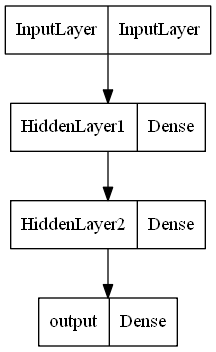

In [60]:
plot_model(model, to_file='model.png')

### DNN with atleast 2 layers

In [49]:
input_a = tf.keras.layers.Input(shape = (X.shape[1],), name = 'InputLayer')
hidden1 = tf.keras.layers.Dense(100,activation='relu',name='HiddenLayer1')(input_a)
hidden2 = tf.keras.layers.Dense(50,activation='relu',name='HiddenLayer2')(hidden1)
output=tf.keras.layers.Dense(1,name='output')(hidden2)

In [50]:
model=tf.keras.Model(inputs=[input_a],outputs=[output])

In [51]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 15)]              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               1600      
                                                                 
 HiddenLayer2 (Dense)        (None, 50)                5050      
                                                                 
 output (Dense)              (None, 1)                 51        
                                                                 
Total params: 6,701
Trainable params: 6,701
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 15),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'InputLayer'},
   'name': 'InputLayer',
   'inbound_nodes': []},
  {'class_name': 'Dense',
   'config': {'name': 'HiddenLayer1',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'HiddenLayer1',
   'inbound_nodes': [[['InputLayer', 0, 0, {}]]]},
  {'class_name': 'Dense',
   'config': {'name': 'HiddenLayer2',
    'trainable': True,
    'dtype': 'float32',
    'units': 50,
    'activation': 'relu',
    'use_bias': True,
    'kerne

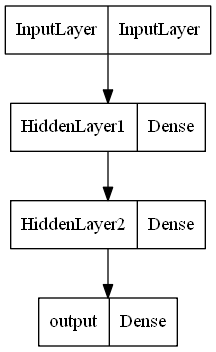

In [53]:
plot_model(model, to_file='model.png')

In [55]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mse', 'mae', 'mape', 'accuracy']
)

history = model.fit(
    X_train,
    Y_train,
    batch_size = 256,
    epochs=10,
    validation_data=(X_test, Y_test),
    shuffle=True, 
    verbose=True,

)


Epoch 1/10
20015/20015 [==============================] - 62s 3ms/step - loss: 4.0742 - mse: 3844.1287 - mae: 4.0742 - mape: 7032677.5000 - accuracy: 1.5652e-04 - val_loss: 4.1132 - val_mse: 3924.5898 - val_mae: 4.1132 - val_mape: 6805667.5000 - val_accuracy: 1.4364e-04
Epoch 2/10
20015/20015 [==============================] - 65s 3ms/step - loss: 4.0021 - mse: 3843.3293 - mae: 4.0021 - mape: 7009889.5000 - accuracy: 1.4169e-04 - val_loss: 4.0648 - val_mse: 3921.9277 - val_mae: 4.0648 - val_mape: 6452398.0000 - val_accuracy: 1.4364e-04
Epoch 3/10
20015/20015 [==============================] - 63s 3ms/step - loss: 3.9992 - mse: 3843.2942 - mae: 3.9992 - mape: 6930932.0000 - accuracy: 1.4169e-04 - val_loss: 4.0489 - val_mse: 3925.1816 - val_mae: 4.0489 - val_mape: 6907352.0000 - val_accuracy: 1.4364e-04
Epoch 4/10
20015/20015 [==============================] - 68s 3ms/step - loss: 3.9996 - mse: 3843.0308 - mae: 3.9996 - mape: 7195464.5000 - accuracy: 1.4169e-04 - val_loss: 4.0765 - val_m